# Agora é a sua vez de fazer uma rede de aprendizado profundo usando o dataset
## [Fashion-Mnist](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)!

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Importando o data set com as imagens
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import numpy as np

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dimensões do conjunto de treinamento: (60000, 28, 28)
Dimensões do conjunto de teste: (10000, 28, 28)


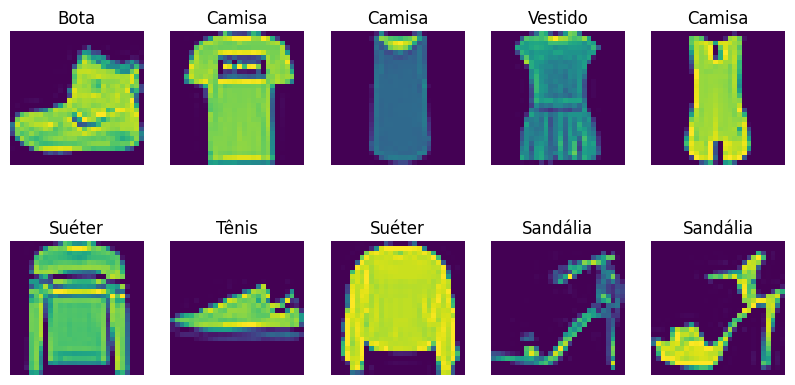

In [4]:
# Carregamento dos dados
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Dimensões do conjunto de treinamento:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

# Mudando as classes para os labels das imagens
classes = ['Camisa', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Blusa', 'Tênis', 'Bolsa', 'Bota']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    # Deixando os indices como [i][0], apenas uma imagem é carregada, porque cada linha
    # é uma imagem e tem todos os pixels presentes. O índice da linha como 0 só plota a primeira imagem.
    plt.title(classes[y_train[i]])
    # Tirando o [0] já resolve o erro.
    plt.axis('off')
plt.show()

In [5]:
# Normalização dos dados
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Contruindo o modelo

# No formato do input, temos que mudar o que era (32, 32, 3), representando imagens de 32x32 pixels em
# 3 valores de cores diferentes, para o que as nossas imagens teste suportam, que são imagens de 28x28
# pixels em apenas 1 valor de cor.
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
# Resumo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6650 - loss: 0.9295 - val_accuracy: 0.8547 - val_loss: 0.3971
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8495 - loss: 0.4258 - val_accuracy: 0.8819 - val_loss: 0.3259
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8762 - loss: 0.3504 - val_accuracy: 0.8873 - val_loss: 0.3011
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 67ms/step - accuracy: 0.8932 - loss: 0.3054 - val_accuracy: 0.8923 - val_loss: 0.2910
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9015 - loss: 0.2778 - val_accuracy: 0.9030 - val_loss: 0.2649
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9096 - loss: 0.2528 - val_accuracy: 0.9062 - val_loss: 0.2617
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9113 - loss: 0.2415 - val_accuracy: 0.9105 - val_loss: 0.2520
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9221 - loss: 0.2171 - 

In [8]:
# Avaliando o modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 3s - 9ms/step - accuracy: 0.9064 - loss: 0.2577
Acurácia no conjunto de teste: 90.64%


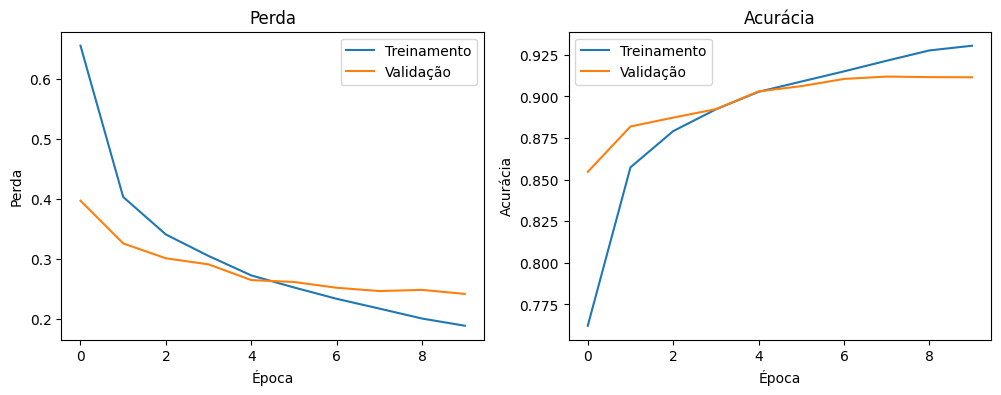

In [9]:
# Gráfico de perda e acurácia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [10]:
# Mudando o tamanho do dataset
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# No input .fit(), ele recebe uma amostra que deve ter 4 dimensões, enquanto o nosso X_train tem apenas 3.
# Para mudar a amostra, temos que dar um reshape nela. O tamanho dos pixels deve continuar o mesmo, e no final do método devemos colocar a
# quantidade de canais de cor das imagens, que nesse dataset estão em preto e branco, então devemos colocar o número 1.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

# Agora sim podemos
datagen.fit(X_train)

# Retreinando o modelo
model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - accuracy: 0.6554 - loss: 0.9583 - val_accuracy: 0.8646 - val_loss: 0.3792
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.7899 - loss: 0.5805 - val_accuracy: 0.8742 - val_loss: 0.3550
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.8134 - loss: 0.5204 - val_accuracy: 0.8555 - val_loss: 0.3996
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.8235 - loss: 0.4834 - val_accuracy: 0.8628 - val_loss: 0.3927
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.8325 - loss: 0.4643 - val_accuracy: 0.8614 - val_loss: 0.3815
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.8390 - loss: 0.4461 - val_accuracy: 0.8594 - val_loss: 0.4098
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.8434 - loss: 0.4346 - val_accuracy: 0.8786 - val_loss: 0.3511
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.8515 - loss: 0.4134 - val_accurac

In [11]:
# Reavaliando o modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 4s - 13ms/step - accuracy: 0.8858 - loss: 0.3240
Acurácia no conjunto de teste: 88.58%


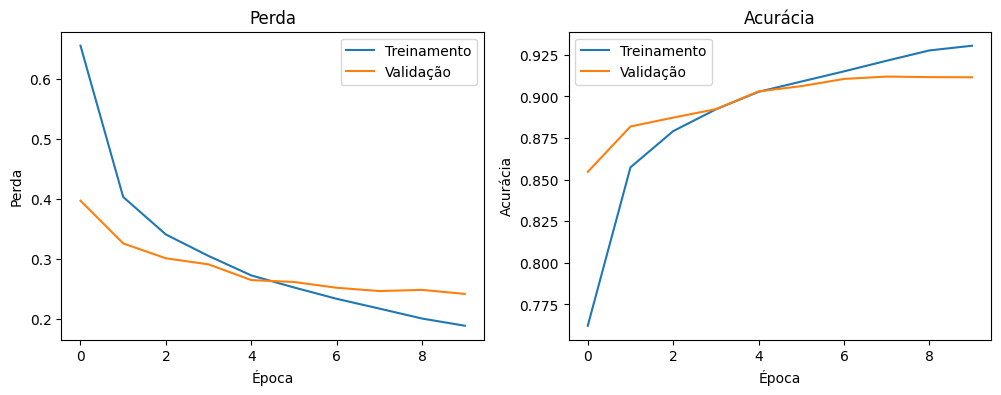

In [12]:
# Novo Gráfico de perda e acurácia
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()